# Linear regression example

In [1]:
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target


In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [86]:
X = bos.drop('PRICE', axis=1).values
y = bos.PRICE.values

X_min = X.min(axis=0)[None,:]
X_max = X.max(axis=0)[None,:]

y_max = y.max()

X = (X - X_min) / (X_max - X_min) *y_max


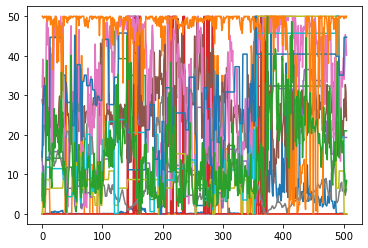

In [87]:
import matplotlib.pyplot as plt

plt.plot(X)
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404,), (102,))

In [89]:
np.savetxt("data/X_train.csv", X_train, delimiter=",")
np.savetxt("data/X_test.csv", X_test, delimiter=",")
np.savetxt("data/y_train.csv", y_train, delimiter=",")
np.savetxt("data/y_test.csv", y_test, delimiter=",")


In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


In [91]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lr.predict(X_test)))


3.422509700735783


In [92]:
lr.coef_, lr.intercept_


(array([-0.19134687,  0.09566276,  0.02650692,  0.04115774, -0.18270171,
         0.39172174,  0.00906266, -0.31167159,  0.12117142, -0.13000169,
        -0.19709712,  0.06021108, -0.36763054]),
 27.57944088016915)

In [93]:
np.savetxt("data/coeff.csv", lr.coef_, delimiter=",")
np.savetxt("data/intercept.csv", np.array([lr.intercept_]), delimiter=",")


In [94]:
lr.coef_.shape, lr.intercept_.shape


((13,), ())

In [95]:
X_temp = np.zeros_like(bos)
X_temp[:,0] = lr.intercept_
X_temp[:,1:] = X*lr.coef_[None,:]

X_stat = pd.DataFrame(X_temp, columns=["Intercept"]+list(bos.columns[:-1])).describe()

print("all min: %f, all max: %f\n"%(X_stat.loc["min"].min(), X_stat.loc["max"].max()))

X_stat


all min: -18.381527, all max: 27.579441



,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.757944e+01,-0.387899,0.543538,0.518711,0.142344,-3.189668,10.221372,0.306483,-3.777168,2.252052,-2.744390,-6.138877,2.705187,-5.540358
std,2.418236e-13,0.924964,1.115545,0.333297,0.522691,2.178091,2.636812,0.131361,2.983977,2.293633,2.090659,2.269705,0.693046,3.622064
min,2.757944e+01,-9.567344,0.000000,0.000000,0.000000,-9.135085,0.000000,0.000000,-15.583580,0.000000,-6.500084,-9.854856,0.000000,-18.381527
25%,2.757944e+01,-0.394734,0.000000,0.229798,0.000000,-4.492357,8.723483,0.196583,-5.751714,0.790248,-5.941871,-7.967756,2.847170,-7.722372
50%,2.757944e+01,-0.026904,0.000000,0.448422,0.000000,-2.875860,9.935652,0.348133,-2.944497,1.053665,-1.773878,-6.762109,2.969105,-4.884495
75%,2.757944e+01,-0.008143,0.597892,0.857005,0.000000,-1.202974,11.493081,0.425483,-1.375391,6.058571,-1.141236,-5.032267,3.005430,-2.647670
max,2.757944e+01,-0.000000,4.783138,1.325346,2.057887,-0.000000,19.586087,0.453133,-0.000000,6.058571,-0.000000,-0.000000,3.010554,-0.000000


In [97]:
y_temp = X.dot(lr.coef_) + lr.intercept_

# print(mean_absolute_error(y, y_temp))

y_stat = pd.DataFrame(y_temp, columns=bos.columns[-1:]).describe()

y_stat


,PRICE
count,506.000000
mean,22.490767
std,7.938149
min,-4.034979
25%,17.170843
50%,21.739412
75%,27.686284
max,44.500107


In [98]:
Z_temp = X_temp.cumsum(axis=1)

Z_stat = pd.DataFrame(Z_temp, columns=X_stat.columns).describe()

print("all min: %f, all max: %f\n"%(Z_stat.loc["min"].min(), Z_stat.loc["max"].max()))

Z_stat


all min: -4.034979, all max: 50.149012



,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.757944e+01,27.191542,27.735080,28.253791,28.396134,25.206466,35.427838,35.734321,31.957153,34.209204,31.464815,25.325938,28.031125,22.490767
std,2.418236e-13,0.924964,1.585466,1.406107,1.508816,3.148153,4.775217,4.695811,3.675699,3.716286,3.821542,5.001832,5.188407,7.938149
min,2.757944e+01,18.012097,18.012097,18.869102,18.869102,13.493311,21.323746,21.776879,21.027806,25.259256,21.144506,13.176750,13.844404,-4.034979
25%,2.757944e+01,27.184707,27.184707,27.767833,27.770366,23.665538,32.719998,33.125511,29.649624,31.579746,29.146162,22.061527,24.586722,17.170843
50%,2.757944e+01,27.552537,27.557588,28.009357,28.028654,25.203856,35.104382,35.471263,31.706106,34.025168,31.145957,24.335893,27.120577,21.739412
75%,2.757944e+01,27.571298,28.167291,28.647363,28.874233,27.346500,38.521036,38.726058,33.899064,36.579870,33.376369,27.775618,30.729116,27.686284
max,2.757944e+01,27.579441,32.361718,32.403500,33.977655,33.676911,50.046812,50.149012,43.410190,48.781788,43.273738,42.225349,45.225427,44.500107


In [100]:
X_test[0,:]*lr.coef_

array([-0.24814477,  0.        ,  0.92890808,  0.        , -4.13522383,
        8.70284271,  0.440533  , -1.78425603,  1.05366452, -2.67942406,
       -2.2016168 ,  2.64032654, -5.22433021])

In [ ]:
8: [-0.24822178160482267, -0.000000003386986691111815, 0.9582340537886331, -0.000000001460414011944522, -4.1554140987698, 8.72186886266871, 0.4747039132901296, -1.7889984948912883, 1.052989127403027, -2.6971016200741644, -2.203499005614539, 2.6550517658369728, -5.2180342868612755]
2: [-0.4305888048246942, -0.00000000587538373508778, 0.0, 0.0, -3.757555302079073, 11.0650575123409, 0.0, -1.9008109008219947, 1.4436141262783444, -3.4216960851687155, -3.708859712420516, 0.0, -7.077652889093752]
4: [-0.2583532828948165, -0.0000000035252298857813003, 1.1635699224576257, -0.000000001182238307251282, -4.509066362494892, 9.58971651069545, 0.0, -1.9008109008219947, 1.1548913010226762, -2.737356868134974, -2.225315827452306, 2.9119922593050678, -5.662122311275002]